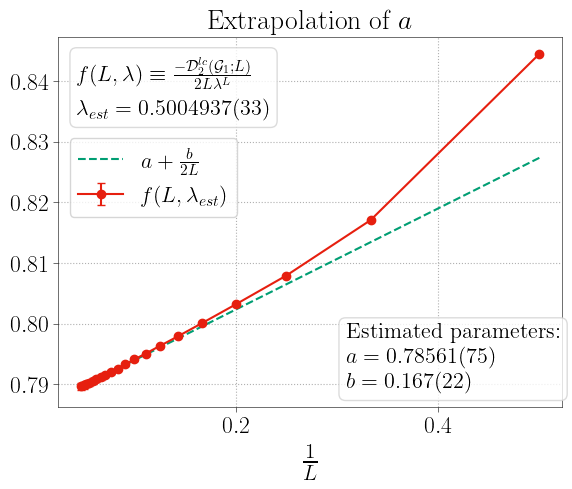

Intercetta fittata (a): 0.78561 ± 0.00075
Pendenza fittata (b): 0.16689 ± 0.02212


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams

# Configure Matplotlib to use LaTeX
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["CMU Serif"],  # Correct font
    "axes.labelsize": 24,
    "axes.titlesize": 30,
    "xtick.labelsize": 36,
    "ytick.labelsize": 16,
})


data = np.loadtxt(f"analisi_dati_PJ/PJ_media.dat", comments='#')

# Extract columns: lengths (L), correlations, and errors on correlations
L = data[:, 0]
corr = data[:, 1]
corr_err = data[:, 2]

# Calculate 1/L
inv_L = 1 / L

# Define the lambda values
lambda_1 = 0.5
lambda_2 = 0.5004937
delta_lambda = 0.0000033  # Error on lambda

# Calculate transformed correlations for lambda_1 and lambda_2
corr_transformed_1 = corr / (2 * L * (lambda_1 ** L))
corr_transformed_2 = corr / (2 * L * (lambda_2 ** L))


# Calculate relative errors on data and on lambda
relative_corr_err = corr_err / corr
relative_lambda_err = L * delta_lambda / lambda_2


# Calculate total errors on transformed correlations (lambda_2)
total_relative_err = np.sqrt(relative_corr_err**2 + relative_lambda_err**2)
corr_transformed_2_err = corr_transformed_2 * total_relative_err

# Linear fit for the ten points nearest to the red line
inv_L_fit = inv_L[-10:]
corr_transformed_2_fit = corr_transformed_2[-10:]
corr_transformed_2_fit_err = corr_transformed_2_err[-10:]

# Linear function to fit
def linear_fit(x, b, a):
    return b/2 * x + a

# Perform fit with errors
params, covariance = curve_fit(linear_fit, inv_L_fit, corr_transformed_2_fit, sigma=corr_transformed_2_fit_err, absolute_sigma=True)
b_fit, a_fit = params
b_err, a_err = np.sqrt(np.diag(covariance))  # Errors on parameter estimates

# Add to plot the dashed line
fit_line = linear_fit(inv_L, b_fit, a_fit)

# Single plot with both curves
plt.figure(figsize=(6.5, 4.8))

# Curve with lambda = 0.5 (blue)
#plt.errorbar(inv_L, corr_transformed_1, yerr=None, marker='o', linestyle='-', color='b', label=r'$f(L,\lambda_{ex})$', capsize=3)

# Curve with lambda = 0.5004937 (ref)
plt.errorbar(inv_L, corr_transformed_2, yerr=corr_transformed_2_err, marker='o', linestyle='-', color='#e61f0f', label=r'$f(L,\lambda_{est})$', capsize=3)

# Add the fitted line (dashed green)
plt.plot(inv_L, fit_line, linestyle='--', color='#009e73', label=r'$a+\frac{b}{2L}$')


# Set x-axis labels
plt.xlabel(r'$\frac{1}{L}$', fontsize=22)


# Add legend with controlled positioning
legend_params = {'loc': 'center left', 'bbox_to_anchor': (0,0.62), 'bbox_transform': plt.gca().transAxes, 'fontsize': 16}
plt.legend(**legend_params)


# Set grid with a lower zorder than markers
plt.grid(True, which="both", ls="dotted", linewidth=0.8)


# Formatting
first_line = r'$f(L,\lambda)\equiv\frac{-\mathcal{D}_{2}^{lc}(\mathcal{G}_1;L)}{2L\lambda^L}$'
#second_line = r'$\lambda_{ex} = 0.5$'
third_line = r'$\lambda_{est} = 0.5004937(33)$'


plt.text(0.036, 0.86, f'{first_line}\n{third_line}', transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='center',
         linespacing=1.6,  # Default value is 1.0, reduce to bring lines closer
         bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round,pad=0.3', alpha=0.8))



# Function to format parameters in the correct format
def format_param(value, error):
    # Find the number of significant digits in the error
    number_digits_errors = 2
    error_digits = -int(np.floor(np.log10(abs(error)))) + number_digits_errors -1
    rounded_value = round(value, error_digits)
    rounded_error = round(error * 10**error_digits)
    return f"{rounded_value:.{error_digits}f}({rounded_error})"


# Formatting
a_text = r'$a = {}$'.format(format_param(a_fit, a_err))
b_text = r'$b = {}$'.format(format_param(b_fit, b_err))


# Add the second box (hypothetically for fitted parameters, positioned lower)
plt.text(0.57, 0.13, f'Estimated parameters:\n{a_text}\n{b_text}', transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='center',
         bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round,pad=0.3', alpha=0.8))


# Set the title
plt.title(f'Extrapolation of $a$', fontsize=20)


plt.xticks(fontsize=17)  # Change the font size of numbers on the x-axis
plt.yticks(fontsize=17)  # Change the font size of numbers on the y-axis


ax = plt.gca()  # Get the axes object
ax.spines['top'].set_linewidth(0.4)   # Top border
ax.spines['right'].set_linewidth(0.4) # Right border
ax.spines['bottom'].set_linewidth(0.4) # Bottom border
ax.spines['left'].set_linewidth(0.4)   # Left border


ax.tick_params(axis='both', which='major', width=0.4)  # Major ticks thinner
ax.tick_params(axis='both', which='minor', width=0.3)  # Minor ticks even thinner



# Save plot
plt.savefig('Extrapolation_a_param.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()

# Print the value of a and its uncertainity
a_err = np.sqrt(covariance[1, 1])
b_err = np.sqrt(covariance[0, 0])

print(f'Intercetta fittata (a): {a_fit:.5f} ± {a_err:.5f}')
print(f'Pendenza fittata (b): {b_fit:.5f} ± {b_err:.5f}')
